You need to implement Logistic Regression from scratch in this question

1. You are provided with the dataset of sign language digits. Implement logistic regression from scratch to classify the images provided in the dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Plot a diagram for the sigmoid function. This is used for binary classi cation. How do you modify it for multilabel dataset classification problems? State and Explain the methods used.
3. Use both one vs all and one vs one method for the above problem statement purpose.
4. Also get results using Log Reg from scikit learn.
5. Report accuracy score, Confusion matrix and any other metrics you feel useful and Compare the results - from all the three.



[BONUS]
6. Display few pictures with their predicted and original labels 
7. Do the results differ? State the reasons why it is so.


dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

                

In [1]:
# import libraries
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Plot : Sigmoid Function

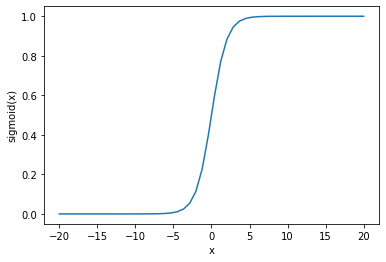

In [2]:
#plot for sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

x = np.linspace(-20, 20, 50)
y = sigmoid(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.show()

In [3]:
# load dataset
x_l = np.load("X.npy") # image
y_l = np.load("Y.npy") # label

### Logistic Regression

In [14]:
def init_w_b(cols):
    w = np.full((cols,),0.05)
    b = 0.05
    return w,b

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def train_ovr(x_train,y_train,l_rate,num_itr):
    r,c = x_train.shape
    rows,classes = y_train.shape
    weights = []
    for j in range(classes):
        w, b = init_w_b(c)
        for i in range(num_itr):

            z= np.dot(x_train,w)+b
            y_pred = sigmoid(z)
            
            loss = -y_train[:,j]*np.log(y_pred)-(1-y_train[:,j])*np.log(1-y_pred)
            cost = (np.sum(loss))/c

            error = (y_pred-y_train[:,j])
            
            dw = np.dot(x_train.T,error)/r
            db = np.sum(y_pred-y_train[:,j])/r

            w = w - (l_rate*dw)
            b = b - (l_rate*db)
        
        weights.append([w,b])
    weights = np.array(weights,dtype='object')
    print(weights.shape)
    return weights


def predict_ovr(x_test,weights):
    classes,_ = weights.shape
    Y_prediction=[]
    for i in range(classes):
        w = weights[i][0]
        b = weights[i][1]

        z= sigmoid(np.dot(x_test,w.T)+b)
        Y_prediction.append(z)
    
    Y_prediction=np.array(Y_prediction)
    
    pred = np.zeros_like(Y_prediction.T)
    
    x=[]
    for i in range(len(Y_prediction.T)):
        x.append(i)
    y=np.argmax(Y_prediction.T,axis =1)
    pred[x,y]=1

    return pred

def train_ovo(x_train,y_train,l_rate,num_itr):
    r,c = x_train.shape
    rows,classes = y_train.shape
    weights=[]
   
    for k1 in range(classes): 
        final_weights=[]
        for k2 in range(k1+1,classes):
            
            k1_true  = np.where(y_train[:,k1]==1,True,False)
            k2_true = np.where(y_train[:,k2]==1,True,False)
            
            
            sel_list = np.logical_or(k1_true,k2_true)
            x_train= x_train[sel_list,:]
            y_train= y_train[sel_list,:]
            
            w,b = init_w_b(c)
            for i in range(num_itr):

                z= np.dot(x_train,w)+b
                y_pred = sigmoid(z)

                error = (y_pred-y_train[:,k2])

                dw = np.dot(x_train.T,error)/r
                db = np.sum(y_pred-y_train[:,k2])/r

                w = w - (l_rate*dw)
                b = b - (l_rate*db)

            weights.append([w,b])
    weights = np.array(weights,dtype='object')
    return weights
            
            
def predict_ovo(x_test,weights):
    classes,_ = weights.shape
    Y_prediction=[]
    for r in range(x_test.shape[0]):
        for i in range(classes):
            for j in range(i+1,classes):
                w = weights[i][0]
                b = weights[i][1]
                z= sigmoid(np.dot(x_test,w.T)+b)
        

In [5]:
# train-test split (70:30)
X_train, X_test, y_train, y_test = train_test_split(x_l, y_l, test_size=0.30, random_state=42)

In [6]:
x_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
print(x_train.shape)
x_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
print(x_test.shape)

(1443, 4096)
(619, 4096)


In [8]:
weights = train_ovr(x_train,y_train,0.01,1000)
pred = predict_ovr(x_test,weights)

<ipython-input-4-e0d442e64b11>:20: RuntimeWarning: divide by zero encountered in log
  loss = -y_train[:,j]*np.log(y_pred)-(1-y_train[:,j])*np.log(1-y_pred)
<ipython-input-4-e0d442e64b11>:20: RuntimeWarning: invalid value encountered in multiply
  loss = -y_train[:,j]*np.log(y_pred)-(1-y_train[:,j])*np.log(1-y_pred)


KeyboardInterrupt: 

In [ ]:
weights = train_ovo(x_train,y_train,0.01,1000)
# pred = predict_ovr(x_test,weights)
print(weights)
print(weight.shape)

In [11]:
print(weights.shape)

(10,)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
yts = np.argmax(y_test,axis=1)
y = np.argmax(y_train,axis=1)
y_pred = np.argmax(pred,axis =1)
print(accuracy_score(y_test,pred))
print(confusion_matrix(yts,y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
o = LogisticRegression(multi_class = 'ovr',solver ='liblinear',max_iter = 1000)
ob = o.fit(x_train,y)
pred = ob.predict(x_test)
print(accuracy_score(yts,pred))
print(confusion_matrix(yts,pred))